<a href="https://colab.research.google.com/github/githubforkj/signate/blob/main/mufj/03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 遊んでみるファイル

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/signate/mufj/Input/train.csv')
test = pd.read_csv('/content/drive/MyDrive/signate/mufj/Input/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9791 entries, 0 to 9790
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            9791 non-null   object
 1   goal          9791 non-null   object
 2   country       9791 non-null   object
 3   duration      9791 non-null   int64 
 4   category1     9791 non-null   object
 5   category2     9791 non-null   object
 6   html_content  9791 non-null   object
 7   state         9791 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 612.1+ KB


In [4]:
train.columns

Index(['id', 'goal', 'country', 'duration', 'category1', 'category2',
       'html_content', 'state'],
      dtype='object')

In [5]:
for i in train.columns[1:6]:
    print(i)

goal
country
duration
category1
category2


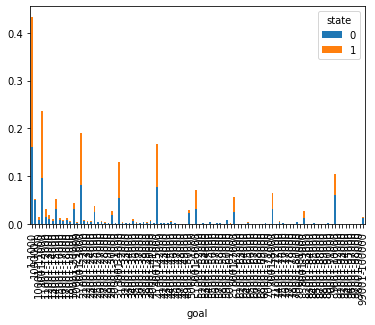

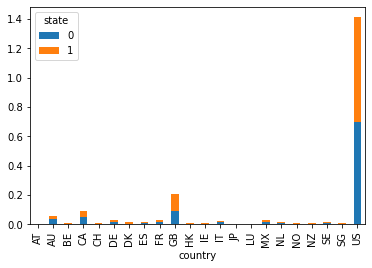

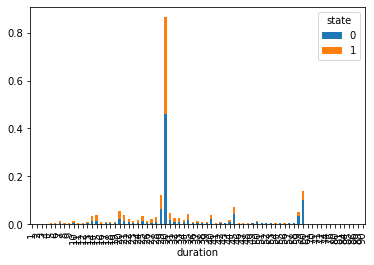

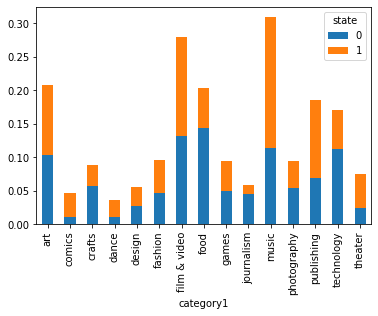

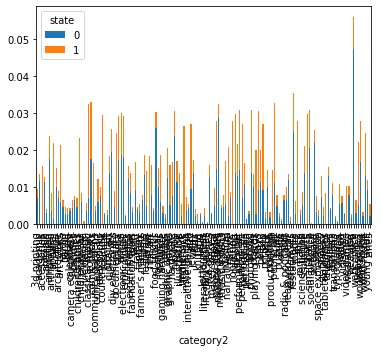

In [6]:
for i in train.columns[1:6]:
    train.groupby('state')[i].value_counts(normalize=True).unstack(0).plot.bar(stacked=True)

# categoryは成否にばらつきがあるように思われる。。

In [7]:
print(train.isnull().value_counts())
print('---------------------------------------------------------')
print(test.isnull().value_counts())
# 欠損値がないことを確認

id     goal   country  duration  category1  category2  html_content  state
False  False  False    False     False      False      False         False    9791
dtype: int64
---------------------------------------------------------
id     goal   country  duration  category1  category2  html_content
False  False  False    False     False      False      False           9800
dtype: int64


In [9]:
train.head()

,id,goal,country,duration,category1,category2,html_content,state
0,train_00000,20001-21000,US,45,art,mixed media,"<div class=""contents""><div><p><a href=""http://...",1
1,train_00001,19001-20000,US,59,food,restaurants,"<div class=""contents""><div><p>Cultural Pretzel...",0
2,train_00002,2001-3000,US,38,art,performance art,"<div class=""contents""><div><p>I want to perfor...",0
3,train_00003,1001-2000,US,30,art,mixed media,"<div class=""contents""><div><div class=""templat...",1
4,train_00004,1001-2000,US,29,film & video,webseries,"<div class=""contents""><div><p>The story of the...",1


In [8]:
from sklearn.preprocessing import LabelEncoder

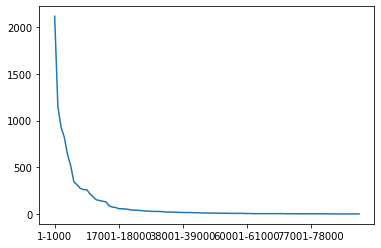

In [11]:
train['goal'].value_counts().plot()
# 10個ほどの質的変数に変更できれば、one-hotエンコーディングできるのでは？

In [13]:
train['goal'].value_counts()

1-1000         2115
1001-2000      1150
2001-3000       928
4001-5000       822
3001-4000       638
               ... 
96001-97000       1
68001-69000       1
93001-94000       1
91001-92000       1
82001-83000       1
Name: goal, Length: 96, dtype: int64


In [8]:
train_x = train.drop(['id'], axis = 1)


# goalカラムは順序尺度のため、one-hot encodingを適用
# country,category1,2は名義尺度のため、label encodingを適用